# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# importing sys
import sys
  
# adding Folder_2 to the system path
sys.path.insert(0, '/Users/keithmoravec/Documents/NU_Data_Science_Bootcamp/NU_Assignments/HW6_API/python-api-challenge')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_api_key

'dfa37313a085d118d4649f618744adf0'

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Get weather data - Single City (Not part of assignment - but this task was completed first to understand json file)

# Build query URL and request your results in F 

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "kapaa"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

# Get temperature from JSON response
lat = weather_json["coord"]["lat"]
lon = weather_json["coord"]["lon"]
max_temp = weather_json["main"]["temp_max"]
humidity = weather_json["main"]["humidity"]
cloudiness = weather_json["clouds"]["all"]
wind_speed = weather_json["wind"]["speed"] 
country = weather_json["sys"]["country"]
date = weather_json["dt"]

# Report temperature
print(f"{city} latitude = {lat}")
print(f"{city} longitude = {lon}")
print(f"Max Temperature in {city} = {max_temp}")
print(f"Humidity in {city} = {humidity}")
print(f"Cloudiness in {city} = {cloudiness}%")
print(f"Wind Speed in {city}) = {wind_speed}")
print(f"{city} is located in {country}")
print(f"Weather Date: {date}")

kapaa latitude = 22.0752
kapaa longitude = -159.319
Max Temperature in kapaa = 78.78
Humidity in kapaa = 72
Cloudiness in kapaa = 83%
Wind Speed in kapaa) = 17.85
kapaa is located in US
Weather Date: 1638161737


In [17]:
# print(json.dumps(weather_json, indent=4, sort_keys=True))

In [18]:
# cities

In [19]:
# Build query URL and request your results in F 

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set empty lists to hold weather data
city_weather = []
lat = []
lon =[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date =[]

found = 0

# Loop through each character and make API request

print("Beginning Data Retrieval")
print("------------------------------")
print()

for city in cities:
    
    # Create search query, make request and store in json
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    found = found+1
    remainder = found % 50
    if remainder == 0:
        print(f"found = {found}")
        time.sleep(60)
    try:    
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])    
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        city_weather.append(city)
        print(f"{city} has been found ")
    except:
        print(f"{city} not in database")

Beginning Data Retrieval
------------------------------

nalut has been found 
avarua has been found 
barrow has been found 
kapaa has been found 
hermanus has been found 
butaritari has been found 
hofn has been found 
bluff has been found 
rikitea has been found 
malwan not in database
tuatapere has been found 
atambua has been found 
alenquer has been found 
phan rang not in database
puerto ayora has been found 
taolanaro not in database
qaanaaq has been found 
jamestown has been found 
ushuaia has been found 
la ronge has been found 
mildura has been found 
bredasdorp has been found 
port alfred has been found 
botwood has been found 
hobart has been found 
grand gaube has been found 
havre-saint-pierre has been found 
zdvinsk has been found 
lolua not in database
trapani has been found 
saint-raymond has been found 
yulara has been found 
ostrovnoy has been found 
torbay has been found 
wilmington has been found 
krasnoselkup has been found 
dikson has been found 
maniwaki has bee

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame({"City":city_weather,
                   "Latitude":lat,
                   "Longitude":lon,
                   "Max Temp":max_temp,
                   "Humidity":humidity,
                   "Cloudiness":cloudiness,
                   "Wind Speed":wind_speed,
                   "Coundry":country,
                   "Date":date
                  })

In [10]:
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Coundry,Date
0,moose factory,51.2585,-80.6094,21.20,93,90,0.00,CA,1638145115
1,puerto ayora,-0.7393,-90.3518,69.71,81,78,11.32,EC,1638145116
2,bluff,-46.6000,168.3333,57.60,69,43,19.71,NZ,1638145116
3,port elizabeth,-33.9180,25.5701,62.89,88,0,10.36,ZA,1638145117
4,busselton,-33.6500,115.3333,65.84,67,63,8.05,AU,1638145117
...,...,...,...,...,...,...,...,...,...
540,tamworth,52.6340,-1.6959,30.52,91,54,6.87,GB,1638145991
541,portland,45.5234,-122.6762,62.58,65,75,8.05,US,1638145983
542,conceicao do araguaia,-8.2578,-49.2647,75.79,90,31,2.51,BR,1638145992
543,ughelli,5.4899,6.0074,76.28,93,100,1.77,NG,1638145993


In [16]:
# Export file as a CSV, without the Pandas index, but with the header
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humid_indices = []
max_humid = weather_df["Humidity"].max()

#  Get the indices of cities that have humidity over 100%.
if max_humid>100:
    humid_indices = weather_df.index[weather_df["Humidity"] > 100]
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_clean_df = weather_df.drop(labels=humid_indices,inplace=False)

weather_clean_df


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Coundry,Date
0,moose factory,51.2585,-80.6094,21.20,93,90,0.00,CA,1638145115
1,puerto ayora,-0.7393,-90.3518,69.71,81,78,11.32,EC,1638145116
2,bluff,-46.6000,168.3333,57.60,69,43,19.71,NZ,1638145116
3,port elizabeth,-33.9180,25.5701,62.89,88,0,10.36,ZA,1638145117
4,busselton,-33.6500,115.3333,65.84,67,63,8.05,AU,1638145117
...,...,...,...,...,...,...,...,...,...
540,tamworth,52.6340,-1.6959,30.52,91,54,6.87,GB,1638145991
541,portland,45.5234,-122.6762,62.58,65,75,8.05,US,1638145983
542,conceicao do araguaia,-8.2578,-49.2647,75.79,90,31,2.51,BR,1638145992
543,ughelli,5.4899,6.0074,76.28,93,100,1.77,NG,1638145993


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

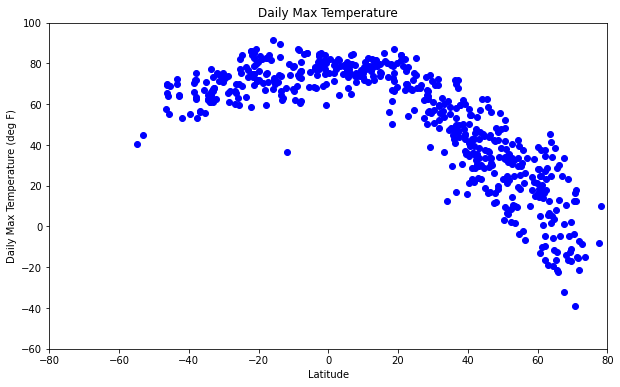

In [33]:
# Generate a scatter plot of Temperature vs. Latitude

plt.figure(figsize=(10,6))
plt.plot(weather_clean_df["Latitude"],weather_clean_df["Max Temp"],'bo')
plt.title('Daily Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Daily Max Temperature (deg F)')
plt.axis(xmin = -80, xmax = 80, ymin = -60, ymax = 100)
plt.show()

In [ ]:
# There is a clear trend of temperature with latitude

## Latitude vs. Humidity Plot

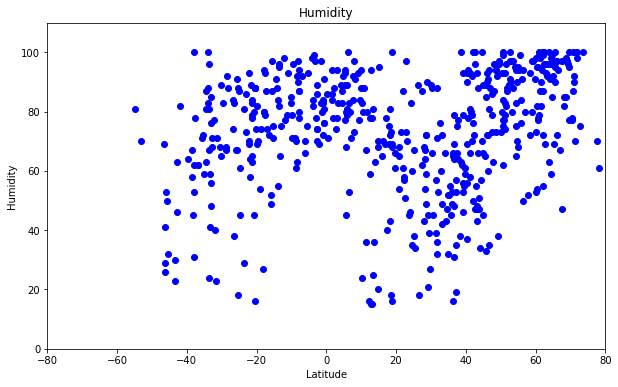

In [40]:
# Generate a scatter plot of Humidity vs. Latitude

plt.figure(figsize=(10,6))
plt.plot(weather_clean_df["Latitude"],weather_clean_df["Humidity"],'bo')
plt.title('Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axis(xmin = -80, xmax = 80, ymin = 0, ymax = 110)
plt.show()

In [ ]:
# There does not appear to be a relationship between Humidity and Latitude

## Latitude vs. Cloudiness Plot

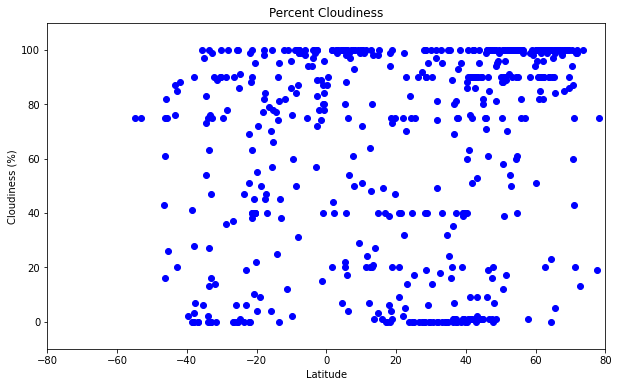

In [42]:
# Generate a scatter plot of Cloudiness vs. Latitude

plt.figure(figsize=(10,6))
plt.plot(weather_clean_df["Latitude"],weather_clean_df["Cloudiness"],'bo')
plt.title('Percent Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axis(xmin = -80, xmax = 80, ymin = -10, ymax = 110)
plt.show()

In [ ]:
# There does not appear to be a relationship between Cloudiness and Latitude

## Latitude vs. Wind Speed Plot

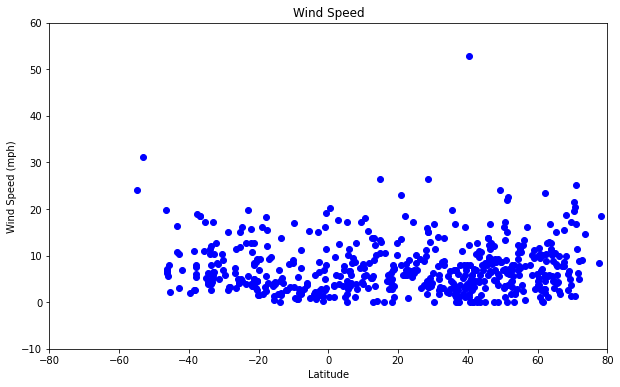

In [44]:
# Generate a scatter plot of Wind Speed vs. Latitude

plt.figure(figsize=(10,6))
plt.plot(weather_clean_df["Latitude"],weather_clean_df["Wind Speed"],'bo')
plt.title('Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axis(xmin = -80, xmax = 80, ymin = -10, ymax = 60)
plt.show()

In [ ]:
# There does not appear to be a relationship between Wind Speed and Latitude

## Linear Regression

In [46]:
# Start by creating a dataframe for the Northern and Southern Hemisphere
northern_df = weather_clean_df[weather_clean_df["Latitude"]>=0]
southern_df = weather_clean_df[weather_clean_df["Latitude"]<0]b

In [47]:
northern_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Coundry,Date
0,moose factory,51.2585,-80.6094,21.20,93,90,0.00,CA,1638145115
7,upernavik,72.7868,-56.1549,-8.52,75,13,9.13,GL,1638145118
8,ugoofaaru,5.6667,73.0000,79.72,80,98,10.04,MV,1638145119
13,tasiilaq,65.6145,-37.6368,28.56,95,99,5.93,GL,1638145121
14,qaanaaq,77.4840,-69.3632,-7.94,70,19,8.37,GL,1638145121
...,...,...,...,...,...,...,...,...,...
539,xining,36.6167,101.7667,16.93,79,80,1.16,CN,1638145719
540,tamworth,52.6340,-1.6959,30.52,91,54,6.87,GB,1638145991
541,portland,45.5234,-122.6762,62.58,65,75,8.05,US,1638145983
543,ughelli,5.4899,6.0074,76.28,93,100,1.77,NG,1638145993


In [48]:
southern_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Coundry,Date
1,puerto ayora,-0.7393,-90.3518,69.71,81,78,11.32,EC,1638145116
2,bluff,-46.6000,168.3333,57.60,69,43,19.71,NZ,1638145116
3,port elizabeth,-33.9180,25.5701,62.89,88,0,10.36,ZA,1638145117
4,busselton,-33.6500,115.3333,65.84,67,63,8.05,AU,1638145117
5,cape town,-33.9258,18.4232,61.21,100,75,4.61,ZA,1638145118
...,...,...,...,...,...,...,...,...,...
525,chicama,-7.8447,-79.1469,61.34,80,100,7.25,PE,1638145985
527,camabatela,-8.1881,15.3750,60.66,97,87,2.37,AO,1638145986
530,kampene,-3.6000,26.6667,67.93,99,100,0.69,CD,1638145988
537,port-gentil,-0.7193,8.7815,80.13,76,96,8.05,GA,1638145990


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7804491903039736


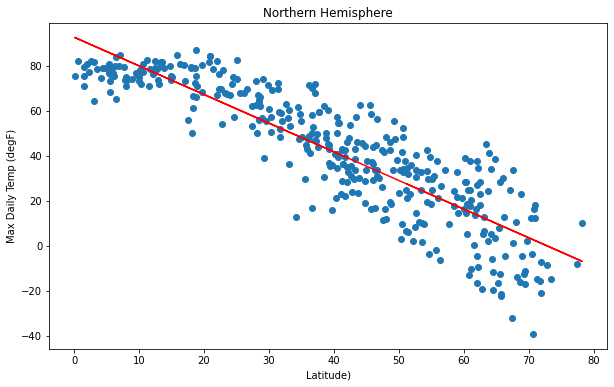

In [49]:
plt.figure(figsize=(10,6))

x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Max Daily Temp (degF)')
plt.title("Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.25492627017048747


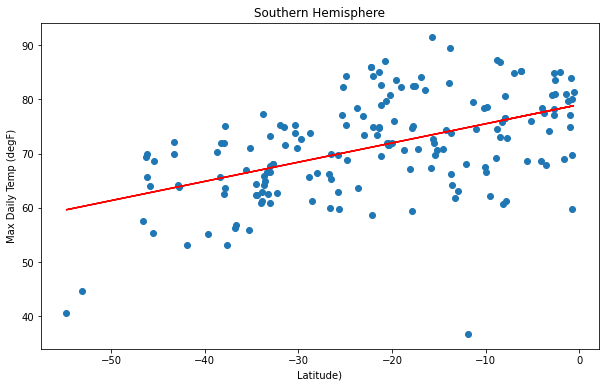

In [50]:
plt.figure(figsize=(10,6))

x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Max Daily Temp (degF)')
plt.title("Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09148547597481624


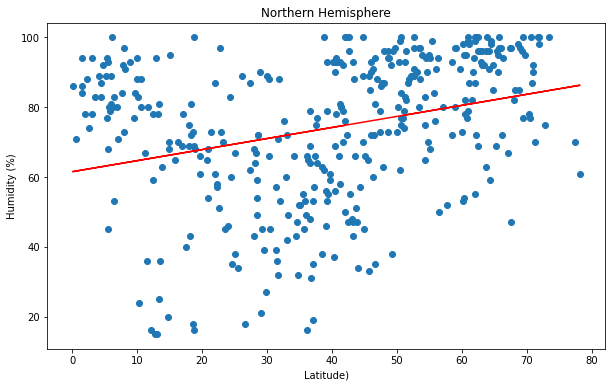

In [51]:
plt.figure(figsize=(10,6))

x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1967176643509606


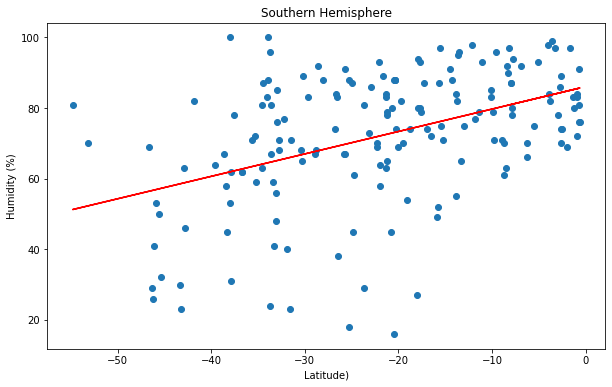

In [54]:
plt.figure(figsize=(10,6))

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06291793854486268


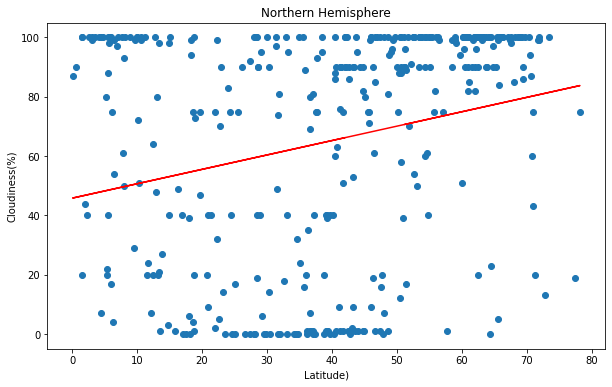

In [52]:
plt.figure(figsize=(10,6))

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Cloudiness(%)')
plt.title("Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11120937241505756


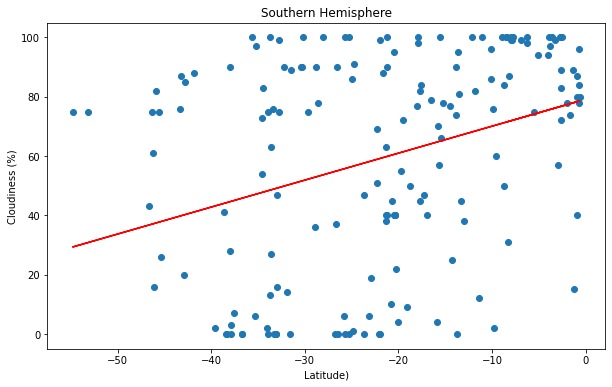

In [55]:
plt.figure(figsize=(10,6))

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005368701414744371


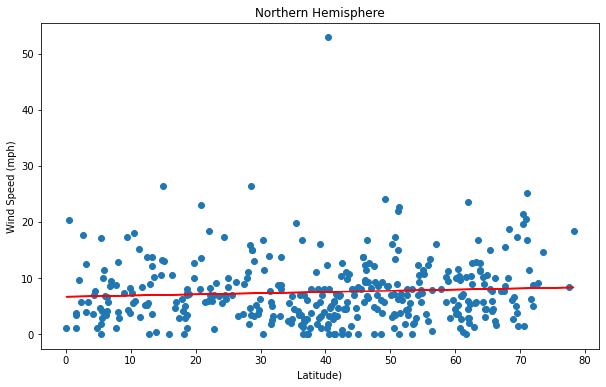

In [53]:
plt.figure(figsize=(10,6))

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11121732893241931


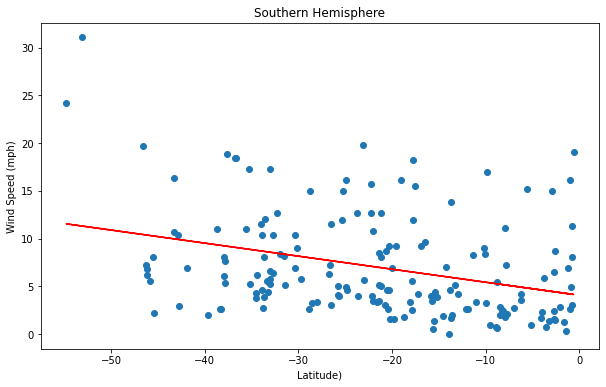

In [56]:
plt.figure(figsize=(10,6))

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude)')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()